In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [3]:
file_path = "data/breast_cancer/original/breast-cancer-wisconsin.data"

In [20]:
import seaborn as sns

In [5]:
cols = [
    "id",
    "clump_thickness",
    "uniformity_of_cell_size",       
    "uniformity_of_cell_shape",      
    "marginal_adhesion",             
    "single_epithelial_cell_size",   
    "bare_nuclei",                   
    "bland_chromatin",               
    "normal_nucleoli",               
    "mitoses",
    "class"
]

In [6]:
df = pd.read_csv(file_path,sep=",",names=cols)
df.sample(10)

,id,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
300,635844,8,4,10,5,4,4,7,10,1,4
32,1072179,10,7,7,3,8,5,7,4,3,4
666,1347943,5,2,2,2,2,1,1,1,2,2
462,1276091,6,1,1,3,2,1,1,1,1,2
514,1306282,6,6,7,10,3,10,8,10,2,4
442,734111,1,1,1,3,2,3,1,1,1,2
248,167528,4,1,1,1,2,1,3,6,1,2
293,601265,10,4,4,6,2,10,2,3,1,4
70,1121919,5,1,3,1,2,1,2,1,1,2
225,1227244,1,1,1,1,2,1,2,1,1,2


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   id                           699 non-null    int64 
 1   clump_thickness              699 non-null    int64 
 2   uniformity_of_cell_size      699 non-null    int64 
 3   uniformity_of_cell_shape     699 non-null    int64 
 4   marginal_adhesion            699 non-null    int64 
 5   single_epithelial_cell_size  699 non-null    int64 
 6   bare_nuclei                  699 non-null    object
 7   bland_chromatin              699 non-null    int64 
 8   normal_nucleoli              699 non-null    int64 
 9   mitoses                      699 non-null    int64 
 10  class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [8]:
df.describe()

,id,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bland_chromatin,normal_nucleoli,mitoses,class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [67]:
class_counts = df['class'].value_counts()
class_counts

class
2    458
4    241
Name: count, dtype: int64

the dataset is class inbalanced

## Histograms

In [58]:
def plot_histograms(data):
    for col in data:
        plt.figure(figsize=(8,4))
        sns.histplot(data,x=df[col],hue='class',palette='copper')
        plt.xlabel(f"Histogram of {col}")
        plt.ylabel("frequency")
        plt.show()

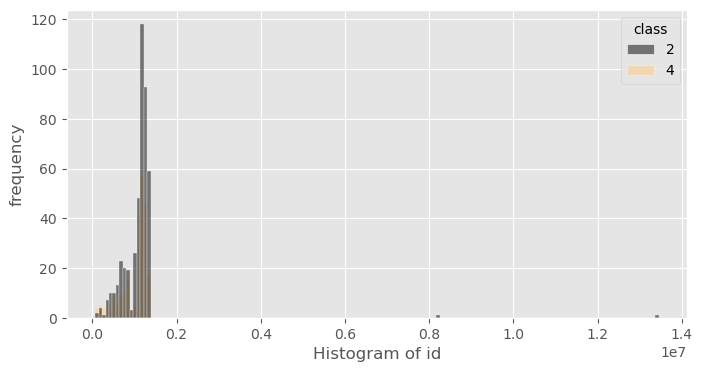

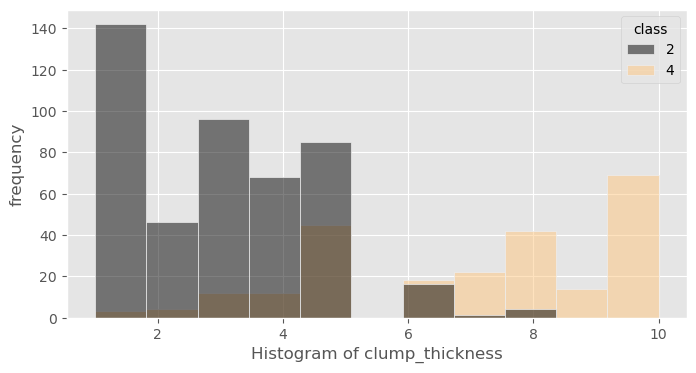

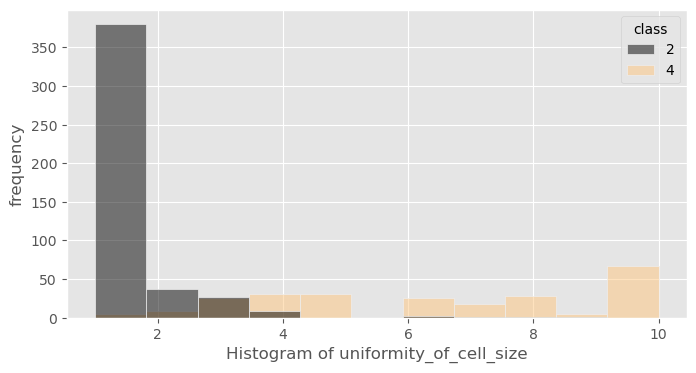

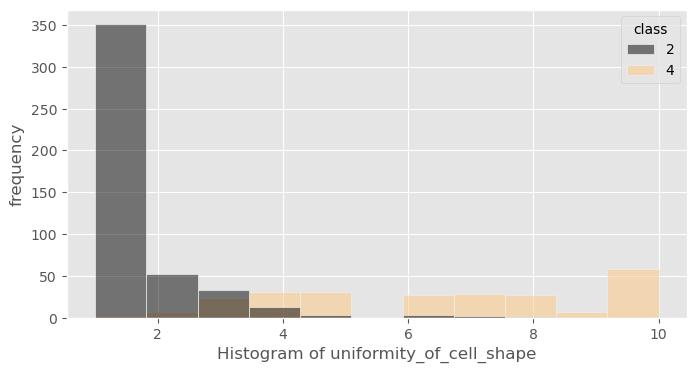

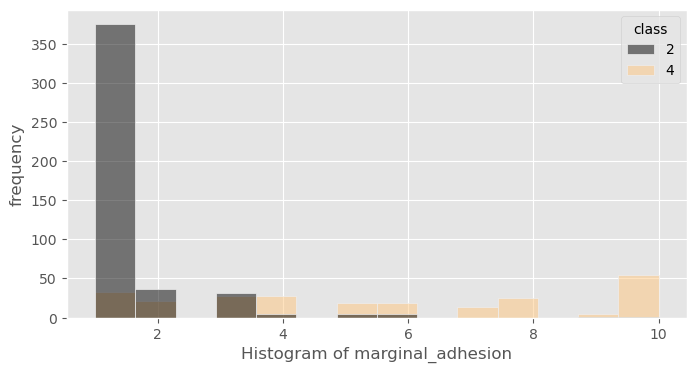

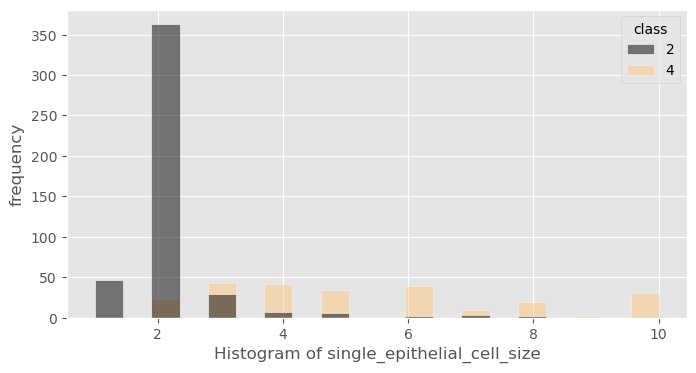

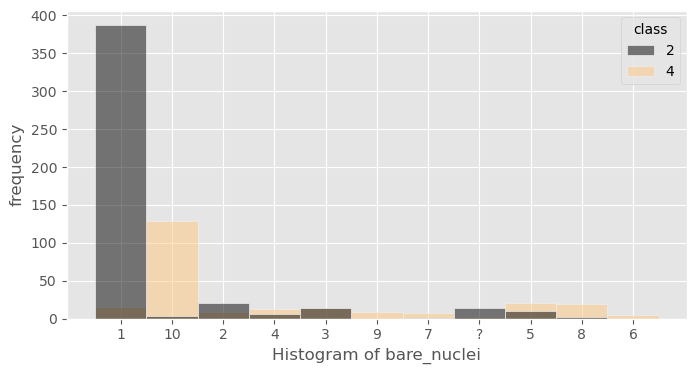

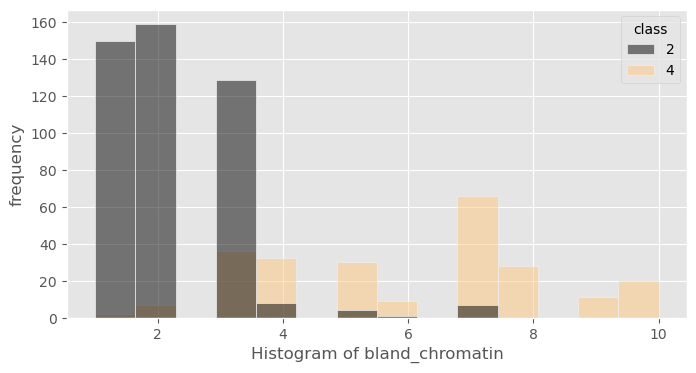

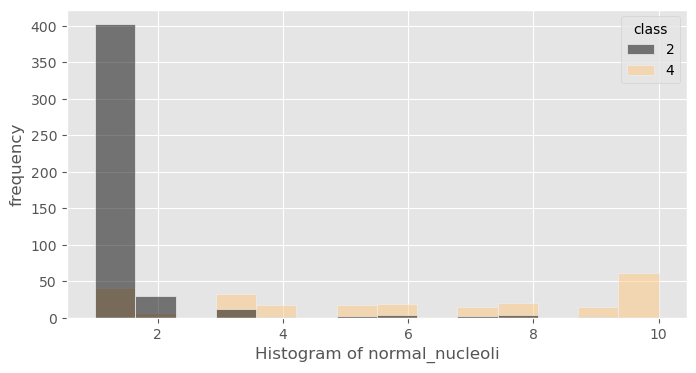

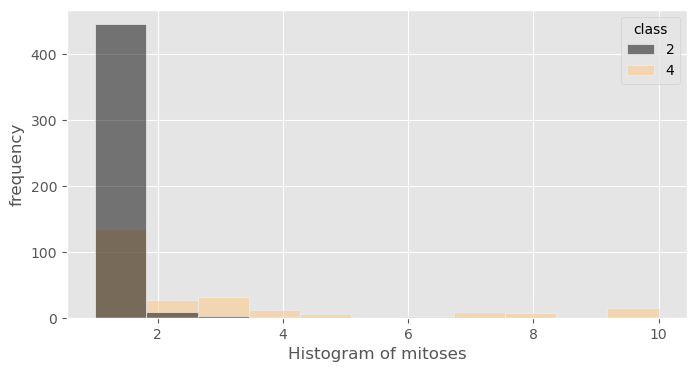

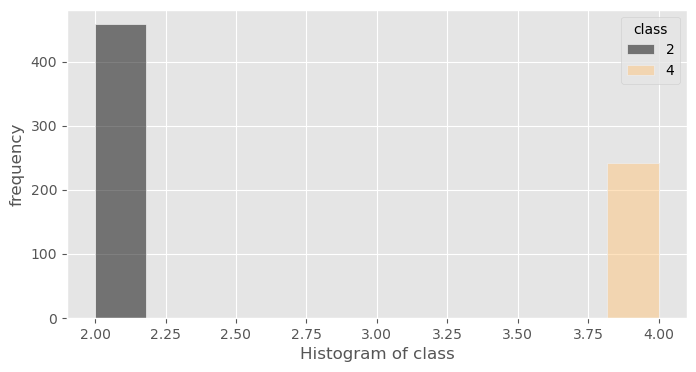

In [59]:
plot_histograms(df)

In [60]:
# plt.hist(df['clump_thickness']);

In [55]:
plt.figure(figsize=(8,4))
sns.kdeplot(data = data, x = '' , hue = 'class', fill = True)
plt.title(f"Distribution of {col}")
plt.xlabel(f"kde of {col}")
# plt.ylabel("frequency")
plt.show()

## boxcox transformation

In [33]:
from scipy.stats import boxcox

In [47]:
x = np.array(df['uniformity_of_cell_shape'])
type(x)

numpy.ndarray

In [48]:
x.shape

(699,)

<Figure size 800x800 with 0 Axes>

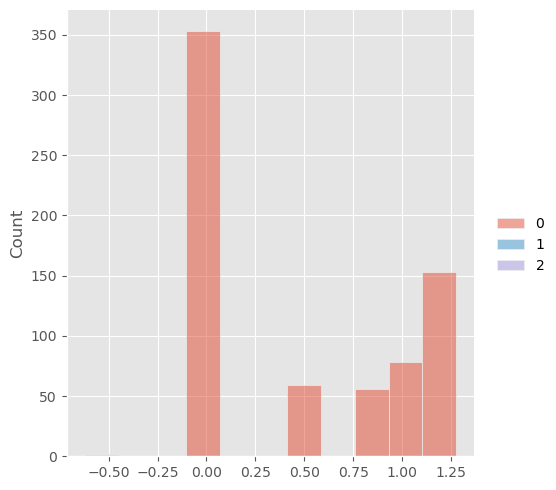

In [52]:
transformed_data = boxcox(x,alpha=0.5)
plt.figure(figsize = (8, 8))
sns.displot(transformed_data)
plt.show()

# docs

In [2]:
pd.read_csv?

Signature:
pd.read_csv(
    filepath_or_buffer: 'FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str]',
    *,
    sep: 'str | None | lib.NoDefault' = <no_default>,
    delimiter: 'str | None | lib.NoDefault' = None,
    header: "int | Sequence[int] | None | Literal['infer']" = 'infer',
    names: 'Sequence[Hashable] | None | lib.NoDefault' = <no_default>,
    index_col: 'IndexLabel | Literal[False] | None' = None,
    usecols: 'UsecolsArgType' = None,
    dtype: 'DtypeArg | None' = None,
    engine: 'CSVEngine | None' = None,
    converters: 'Mapping[Hashable, Callable] | None' = None,
    true_values: 'list | None' = None,
    false_values: 'list | None' = None,
    skipinitialspace: 'bool' = False,
    skiprows: 'list[int] | int | Callable[[Hashable], bool] | None' = None,
    skipfooter: 'int' = 0,
    nrows: 'int | None' = None,
    na_values: 'Hashable | Iterable[Hashable] | Mapping[Hashable, Iterable[Hashable]] | None' = None,
    keep_default_na: 'bool' = True,
    na_filter: '

In [57]:
sns.histplot?

Signature:
sns.histplot(
    data=None,
    *,
    x=None,
    y=None,
    hue=None,
    weights=None,
    stat='count',
    bins='auto',
    binwidth=None,
    binrange=None,
    discrete=None,
    cumulative=False,
    common_bins=True,
    common_norm=True,
    multiple='layer',
    element='bars',
    fill=True,
    shrink=1,
    kde=False,
    kde_kws=None,
    line_kws=None,
    thresh=0,
    pthresh=None,
    pmax=None,
    cbar=False,
    cbar_ax=None,
    cbar_kws=None,
    palette=None,
    hue_order=None,
    hue_norm=None,
    color=None,
    log_scale=None,
    legend=True,
    ax=None,
    **kwargs,
)
Docstring:
Plot univariate or bivariate histograms to show distributions of datasets.

A histogram is a classic visualization tool that represents the distribution
of one or more variables by counting the number of observations that fall within
discrete bins.

This function can normalize the statistic computed within each bin to estimate
frequency, density or probability mas